In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [2]:
plt.rcParams['figure.figsize'] = [12, 6] #Make the graph big

In [3]:
# Generate time vector
duration = 1  # seconds
sampling_rate = 1000  # Hz
time = np.arange(0, duration, 1/sampling_rate) # x timeline
amplitude = 1

## Create Noisy Signal

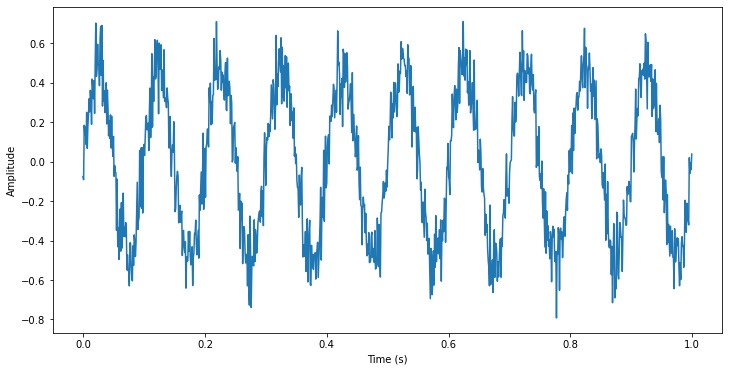

In [4]:
# generate random noise
noise = np.random.normal(0, 0.1, len(time))
noise_amplitude = amplitude - 0.5 # to make sure noise is less than signal
# generate sine wave with random noise
signal = noise_amplitude * np.sin(2 * np.pi * 10 * time) + noise
# plot the signal
plt.plot(time, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Create Persistent Signal

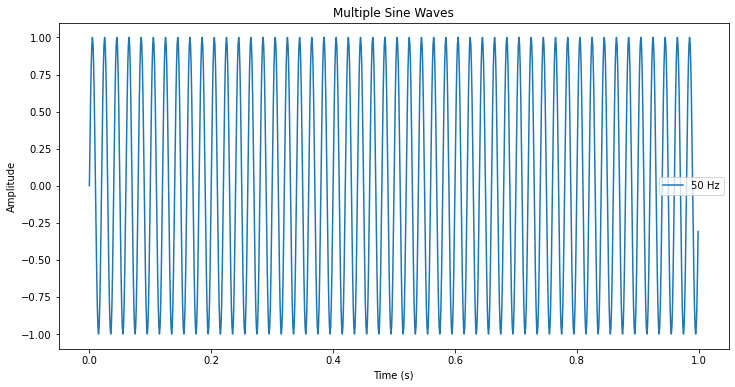

In [5]:
# Generate sine waves
persistent_frequency = 50  # Hz
persistent_sin_wave = amplitude * np.sin(2 * np.pi * persistent_frequency * time)

# Plot sine waves
plt.plot(time, persistent_sin_wave, label='50 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Multiple Sine Waves')
plt.legend()
plt.show()

## Combined Signal

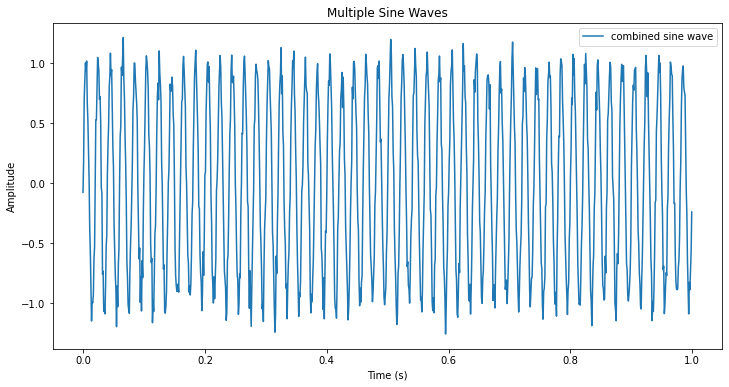

In [6]:
# Generate sine waves
combined_sin_wave = noise + persistent_sin_wave

# Plot sine waves
plt.plot(time, combined_sin_wave, label='combined sine wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Multiple Sine Waves')
plt.legend()
plt.show()

## Fourier Transform

In [ ]:
f = 50

combined_sin_wave length: 1000, fourier_sin_wave length: 1000
max num: 1.2544250230289662, min num: -3.799347727707109e-15
area above: 0.5052971735518833, area below: -4.551404624253057e-16


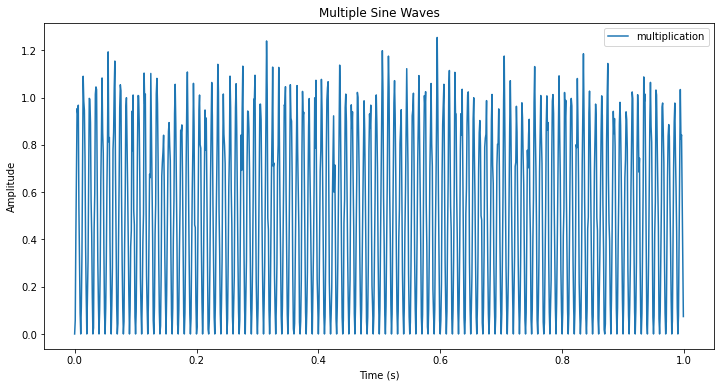

In [7]:
fourier_frequency = 50  # Hz
fourier_sin_wave = amplitude * np.sin(2 * np.pi * fourier_frequency * time)

fourier_sin_x = combined_sin_wave * fourier_sin_wave
max_num = np.amax(fourier_sin_x)
min_num = np.amin(fourier_sin_x)

above_x_axis = fourier_sin_x > 0
below_x_axis = fourier_sin_x < 0
area_above_x_axis = np.trapz(fourier_sin_x[above_x_axis], time[above_x_axis])
area_under_x_axis = np.trapz(fourier_sin_x[below_x_axis], time[below_x_axis])
area_combined = area_above_x_axis + area_under_x_axis

print(f'combined_sin_wave length: {len(combined_sin_wave)}, fourier_sin_wave length: {len(fourier_sin_wave)}')
print(f'max num: {max_num}, min num: {min_num}')
print(f'area above: {area_above_x_axis}, area below: {area_under_x_axis}, area combined: {area_combined}')

# Plot sine waves
plt.plot(time, fourier_sin_x, label='multiplication')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Multiple Sine Waves')
plt.legend()
plt.show()

In [20]:
fourier_sin_x[fourier_sin_x < 0]

array([-3.92552741e-17, -3.02927651e-16, -1.57515558e-16, -2.19084935e-16,
       -1.59148398e-15, -1.37192281e-16, -6.98988819e-16, -2.01039593e-15,
       -2.17356697e-20, -9.44457865e-16, -7.99349454e-16, -5.02571994e-16,
       -7.83219051e-16, -2.11111155e-15, -9.13341671e-16, -3.50748130e-16,
       -6.83441155e-16, -2.30372140e-15, -6.50762845e-17, -1.59836876e-15,
       -1.18883268e-15, -4.74690400e-03, -1.10370428e-16, -1.62972478e-15,
       -8.55428171e-16, -5.94924667e-19, -2.70671388e-15, -2.44502096e-15,
       -7.00513314e-16, -3.95552633e-16, -3.68467224e-15, -1.38741265e-15,
       -4.58648777e-16, -1.60658986e-15, -2.04021369e-17, -1.04761225e-16,
       -1.59821271e-15, -9.13692915e-17, -2.74659115e-15, -4.32042387e-17,
       -1.21391490e-15, -4.02137413e-16, -1.99123881e-15, -5.36298437e-15,
       -4.60173663e-16, -5.78314212e-16, -1.39265933e-15, -1.31383146e-15,
       -1.99830989e-15, -9.15074127e-17, -4.29543112e-15])

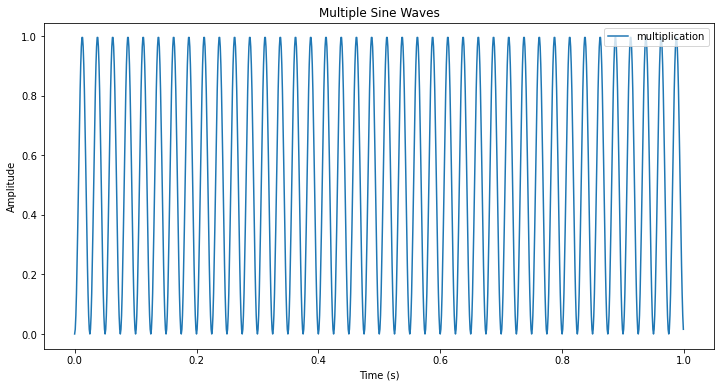

In [20]:
# Generate sine waves
temp_amplitude = 1
temp_frequency = 20  # Hz
temp_sine_wave = temp_amplitude * np.sin(2 * np.pi * temp_frequency * t)

new_sin_wave = sine_wave_1 * temp_sine_wave
# Plot sine waves
plt.plot(t, new_sin_wave, label='multiplication')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Multiple Sine Waves')
plt.legend()
plt.show()

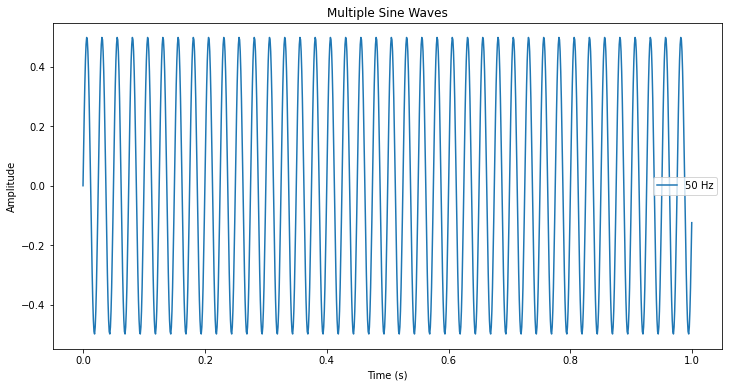

In [5]:
amplitude_2 = 0.5
frequency_2 = 40  # Hz
sine_wave_2 = amplitude_2 * np.sin(2 * np.pi * frequency_2 * t)

# Plot sine waves
plt.plot(t, sine_wave_2, label='50 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Multiple Sine Waves')
plt.legend()
plt.show()

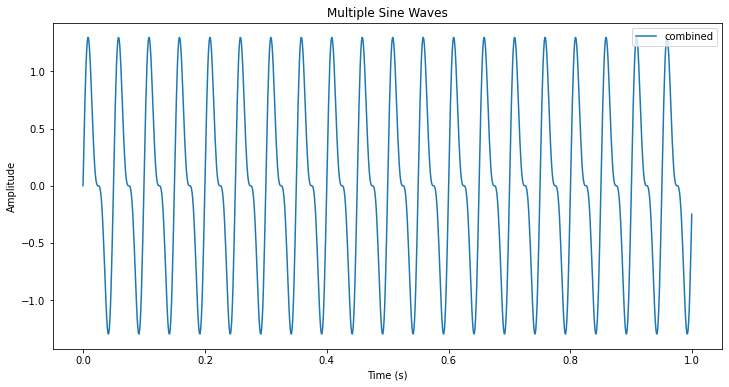

In [6]:
combined_sine_wave = sine_wave_1 + sine_wave_2
# Plot sine waves
plt.plot(t, combined_sine_wave, label='combined')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Multiple Sine Waves')
plt.legend()
plt.show()

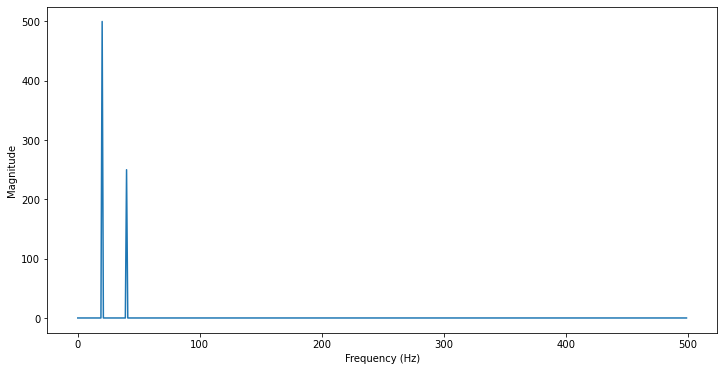

In [7]:
# Take the Fourier transform of the signal
X = np.fft.fft(combined_sine_wave)

# Compute the frequencies corresponding to the Fourier coefficients
freqs = np.fft.fftfreq(len(combined_sine_wave), t[1] - t[0])

# Only keep the positive frequency components
X_pos = X[:len(combined_sine_wave)//2]
freqs_pos = freqs[:len(combined_sine_wave)//2]

plt.plot(freqs_pos, np.abs(X_pos), label='combined fft')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [5]:
import math

In [6]:
# Set the sampling rate and duration of the sine wave
sampling_rate = 44100  # Hz
duration = 1  # seconds

# Calculate the number of samples in the sine wave
num_samples = int(sampling_rate * duration)
print(num_samples)

# Set the frequency of the sine wave
frequency = 1  # Hz

# Generate the samples of the sine wave
samples = []

for i in range(num_samples):
    angle = 2.0 * math.pi * frequency * i / sampling_rate
    sample = math.sin(angle)
    samples.append(sample)

44100


In [7]:
times = []
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

In [8]:
for x in frange(0, 1, 0.1):
    print(x)

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


In [9]:
for x in frange(0, duration, 1/sampling_rate):
    print(x)
    times.append(x)
    print(f'times length: {len(times)}')

0
times length: 1
2.2675736961451248e-05
times length: 2
4.5351473922902495e-05
times length: 3
6.802721088435374e-05
times length: 4
9.070294784580499e-05
times length: 5
0.00011337868480725624
times length: 6
0.00013605442176870748
times length: 7
0.00015873015873015873
times length: 8
0.00018140589569160998
times length: 9
0.00020408163265306123
times length: 10
0.00022675736961451248
times length: 11
0.00024943310657596373
times length: 12
0.00027210884353741496
times length: 13
0.0002947845804988662
times length: 14
0.0003174603174603174
times length: 15
0.00034013605442176863
times length: 16
0.00036281179138321985
times length: 17
0.0003854875283446711
times length: 18
0.0004081632653061223
times length: 19
0.0004308390022675735
times length: 20
0.00045351473922902475
times length: 21
0.000476190476190476
times length: 22
0.0004988662131519273
times length: 23
0.0005215419501133785
times length: 24
0.0005442176870748298
times length: 25
0.0005668934240362811
times length: 26
0.0

times length: 1203
0.027278911564625294
times length: 1204
0.027301587301586744
times length: 1205
0.027324263038548194
times length: 1206
0.027346938775509644
times length: 1207
0.027369614512471094
times length: 1208
0.027392290249432544
times length: 1209
0.027414965986393994
times length: 1210
0.027437641723355444
times length: 1211
0.027460317460316894
times length: 1212
0.027482993197278344
times length: 1213
0.027505668934239794
times length: 1214
0.027528344671201244
times length: 1215
0.027551020408162694
times length: 1216
0.027573696145124144
times length: 1217
0.027596371882085594
times length: 1218
0.027619047619047044
times length: 1219
0.027641723356008494
times length: 1220
0.027664399092969943
times length: 1221
0.027687074829931393
times length: 1222
0.027709750566892843
times length: 1223
0.027732426303854293
times length: 1224
0.027755102040815743
times length: 1225
0.027777777777777193
times length: 1226
0.027800453514738643
times length: 1227
0.027823129251700093


times length: 2453
0.055623582766437765
times length: 2454
0.055646258503399215
times length: 2455
0.055668934240360665
times length: 2456
0.055691609977322115
times length: 2457
0.055714285714283565
times length: 2458
0.055736961451245015
times length: 2459
0.055759637188206465
times length: 2460
0.055782312925167915
times length: 2461
0.055804988662129365
times length: 2462
0.055827664399090815
times length: 2463
0.055850340136052265
times length: 2464
0.055873015873013715
times length: 2465
0.055895691609975165
times length: 2466
0.055918367346936615
times length: 2467
0.055941043083898065
times length: 2468
0.055963718820859515
times length: 2469
0.055986394557820965
times length: 2470
0.056009070294782415
times length: 2471
0.056031746031743865
times length: 2472
0.056054421768705315
times length: 2473
0.056077097505666765
times length: 2474
0.056099773242628215
times length: 2475
0.056122448979589665
times length: 2476
0.056145124716551115
times length: 2477
0.056167800453512565


0.08394557823128879
times length: 3703
0.08396825396825024
times length: 3704
0.08399092970521169
times length: 3705
0.08401360544217314
times length: 3706
0.08403628117913459
times length: 3707
0.08405895691609604
times length: 3708
0.08408163265305749
times length: 3709
0.08410430839001894
times length: 3710
0.08412698412698039
times length: 3711
0.08414965986394184
times length: 3712
0.08417233560090329
times length: 3713
0.08419501133786474
times length: 3714
0.08421768707482619
times length: 3715
0.08424036281178764
times length: 3716
0.08426303854874909
times length: 3717
0.08428571428571054
times length: 3718
0.08430839002267199
times length: 3719
0.08433106575963344
times length: 3720
0.08435374149659489
times length: 3721
0.08437641723355634
times length: 3722
0.08439909297051779
times length: 3723
0.08442176870747924
times length: 3724
0.08444444444444069
times length: 3725
0.08446712018140214
times length: 3726
0.08448979591836359
times length: 3727
0.08451247165532504
times

0.11229024943310126
times length: 4953
0.11231292517006271
times length: 4954
0.11233560090702416
times length: 4955
0.11235827664398561
times length: 4956
0.11238095238094706
times length: 4957
0.11240362811790851
times length: 4958
0.11242630385486996
times length: 4959
0.11244897959183141
times length: 4960
0.11247165532879286
times length: 4961
0.11249433106575431
times length: 4962
0.11251700680271576
times length: 4963
0.11253968253967721
times length: 4964
0.11256235827663866
times length: 4965
0.11258503401360011
times length: 4966
0.11260770975056156
times length: 4967
0.11263038548752301
times length: 4968
0.11265306122448446
times length: 4969
0.11267573696144591
times length: 4970
0.11269841269840736
times length: 4971
0.11272108843536881
times length: 4972
0.11274376417233026
times length: 4973
0.11276643990929171
times length: 4974
0.11278911564625316
times length: 4975
0.11281179138321461
times length: 4976
0.11283446712017606
times length: 4977
0.11285714285713751
times

times length: 6452
0.14630385487528927
times length: 6453
0.14632653061225073
times length: 6454
0.1463492063492122
times length: 6455
0.14637188208617366
times length: 6456
0.14639455782313512
times length: 6457
0.1464172335600966
times length: 6458
0.14643990929705805
times length: 6459
0.14646258503401952
times length: 6460
0.14648526077098098
times length: 6461
0.14650793650794244
times length: 6462
0.1465306122449039
times length: 6463
0.14655328798186537
times length: 6464
0.14657596371882683
times length: 6465
0.1465986394557883
times length: 6466
0.14662131519274976
times length: 6467
0.14664399092971123
times length: 6468
0.1466666666666727
times length: 6469
0.14668934240363415
times length: 6470
0.14671201814059562
times length: 6471
0.14673469387755708
times length: 6472
0.14675736961451855
times length: 6473
0.14678004535148
times length: 6474
0.14680272108844147
times length: 6475
0.14682539682540294
times length: 6476
0.1468480725623644
times length: 6477
0.1468707482993

times length: 7952
0.18031746031748505
times length: 7953
0.18034013605444651
times length: 7954
0.18036281179140798
times length: 7955
0.18038548752836944
times length: 7956
0.1804081632653309
times length: 7957
0.18043083900229237
times length: 7958
0.18045351473925383
times length: 7959
0.1804761904762153
times length: 7960
0.18049886621317676
times length: 7961
0.18052154195013823
times length: 7962
0.1805442176870997
times length: 7963
0.18056689342406115
times length: 7964
0.18058956916102262
times length: 7965
0.18061224489798408
times length: 7966
0.18063492063494554
times length: 7967
0.180657596371907
times length: 7968
0.18068027210886847
times length: 7969
0.18070294784582994
times length: 7970
0.1807256235827914
times length: 7971
0.18074829931975286
times length: 7972
0.18077097505671433
times length: 7973
0.1807936507936758
times length: 7974
0.18081632653063726
times length: 7975
0.18083900226759872
times length: 7976
0.18086167800456018
times length: 7977
0.18088435374

0.21430839002271937
times length: 9452
0.21433106575968083
times length: 9453
0.2143537414966423
times length: 9454
0.21437641723360376
times length: 9455
0.21439909297056522
times length: 9456
0.2144217687075267
times length: 9457
0.21444444444448815
times length: 9458
0.21446712018144962
times length: 9459
0.21448979591841108
times length: 9460
0.21451247165537254
times length: 9461
0.214535147392334
times length: 9462
0.21455782312929547
times length: 9463
0.21458049886625694
times length: 9464
0.2146031746032184
times length: 9465
0.21462585034017986
times length: 9466
0.21464852607714133
times length: 9467
0.2146712018141028
times length: 9468
0.21469387755106425
times length: 9469
0.21471655328802572
times length: 9470
0.21473922902498718
times length: 9471
0.21476190476194865
times length: 9472
0.2147845804989101
times length: 9473
0.21480725623587157
times length: 9474
0.21482993197283304
times length: 9475
0.2148526077097945
times length: 9476
0.21487528344675597
times length:

0.2426530612245492
times length: 10702
0.24267573696151065
times length: 10703
0.24269841269847212
times length: 10704
0.24272108843543358
times length: 10705
0.24274376417239504
times length: 10706
0.2427664399093565
times length: 10707
0.24278911564631797
times length: 10708
0.24281179138327944
times length: 10709
0.2428344671202409
times length: 10710
0.24285714285720236
times length: 10711
0.24287981859416383
times length: 10712
0.2429024943311253
times length: 10713
0.24292517006808675
times length: 10714
0.24294784580504822
times length: 10715
0.24297052154200968
times length: 10716
0.24299319727897115
times length: 10717
0.2430158730159326
times length: 10718
0.24303854875289407
times length: 10719
0.24306122448985554
times length: 10720
0.243083900226817
times length: 10721
0.24310657596377847
times length: 10722
0.24312925170073993
times length: 10723
0.2431519274377014
times length: 10724
0.24317460317466286
times length: 10725
0.24319727891162432
times length: 10726
0.243219

times length: 11951
0.270997732426379
times length: 11952
0.27102040816334044
times length: 11953
0.2710430839003019
times length: 11954
0.27106575963726337
times length: 11955
0.27108843537422483
times length: 11956
0.2711111111111863
times length: 11957
0.27113378684814776
times length: 11958
0.2711564625851092
times length: 11959
0.2711791383220707
times length: 11960
0.27120181405903215
times length: 11961
0.2712244897959936
times length: 11962
0.2712471655329551
times length: 11963
0.27126984126991655
times length: 11964
0.271292517006878
times length: 11965
0.2713151927438395
times length: 11966
0.27133786848080094
times length: 11967
0.2713605442177624
times length: 11968
0.27138321995472386
times length: 11969
0.27140589569168533
times length: 11970
0.2714285714286468
times length: 11971
0.27145124716560826
times length: 11972
0.2714739229025697
times length: 11973
0.2714965986395312
times length: 11974
0.27151927437649265
times length: 11975
0.2715419501134541
times length: 11

times length: 13451
0.30501133786857476
times length: 13452
0.3050340136055362
times length: 13453
0.3050566893424977
times length: 13454
0.30507936507945915
times length: 13455
0.3051020408164206
times length: 13456
0.3051247165533821
times length: 13457
0.30514739229034354
times length: 13458
0.305170068027305
times length: 13459
0.30519274376426647
times length: 13460
0.30521541950122794
times length: 13461
0.3052380952381894
times length: 13462
0.30526077097515086
times length: 13463
0.3052834467121123
times length: 13464
0.3053061224490738
times length: 13465
0.30532879818603526
times length: 13466
0.3053514739229967
times length: 13467
0.3053741496599582
times length: 13468
0.30539682539691965
times length: 13469
0.3054195011338811
times length: 13470
0.3054421768708426
times length: 13471
0.30546485260780404
times length: 13472
0.3054875283447655
times length: 13473
0.30551020408172697
times length: 13474
0.30553287981868843
times length: 13475
0.3055555555556499
times length: 1

0.3390022675738091
times length: 14951
0.33902494331077054
times length: 14952
0.339047619047732
times length: 14953
0.33907029478469347
times length: 14954
0.33909297052165494
times length: 14955
0.3391156462586164
times length: 14956
0.33913832199557786
times length: 14957
0.3391609977325393
times length: 14958
0.3391836734695008
times length: 14959
0.33920634920646225
times length: 14960
0.3392290249434237
times length: 14961
0.3392517006803852
times length: 14962
0.33927437641734665
times length: 14963
0.3392970521543081
times length: 14964
0.3393197278912696
times length: 14965
0.33934240362823104
times length: 14966
0.3393650793651925
times length: 14967
0.33938775510215397
times length: 14968
0.33941043083911543
times length: 14969
0.3394331065760769
times length: 14970
0.33945578231303836
times length: 14971
0.3394784580499998
times length: 14972
0.3395011337869613
times length: 14973
0.33952380952392275
times length: 14974
0.3395464852608842
times length: 14975
0.3395691609978

0.37301587301600486
times length: 16451
0.3730385487529663
times length: 16452
0.3730612244899278
times length: 16453
0.37308390022688925
times length: 16454
0.3731065759638507
times length: 16455
0.3731292517008122
times length: 16456
0.37315192743777365
times length: 16457
0.3731746031747351
times length: 16458
0.3731972789116966
times length: 16459
0.37321995464865804
times length: 16460
0.3732426303856195
times length: 16461
0.37326530612258096
times length: 16462
0.37328798185954243
times length: 16463
0.3733106575965039
times length: 16464
0.37333333333346536
times length: 16465
0.3733560090704268
times length: 16466
0.3733786848073883
times length: 16467
0.37340136054434975
times length: 16468
0.3734240362813112
times length: 16469
0.3734467120182727
times length: 16470
0.37346938775523414
times length: 16471
0.3734920634921956
times length: 16472
0.37351473922915707
times length: 16473
0.37353741496611853
times length: 16474
0.37356009070308
times length: 16475
0.37358276644004

times length: 17950
0.40702947845820064
times length: 17951
0.4070521541951621
times length: 17952
0.40707482993212357
times length: 17953
0.40709750566908504
times length: 17954
0.4071201814060465
times length: 17955
0.40714285714300796
times length: 17956
0.4071655328799694
times length: 17957
0.4071882086169309
times length: 17958
0.40721088435389236
times length: 17959
0.4072335600908538
times length: 17960
0.4072562358278153
times length: 17961
0.40727891156477675
times length: 17962
0.4073015873017382
times length: 17963
0.4073242630386997
times length: 17964
0.40734693877566114
times length: 17965
0.4073696145126226
times length: 17966
0.40739229024958407
times length: 17967
0.40741496598654553
times length: 17968
0.407437641723507
times length: 17969
0.40746031746046846
times length: 17970
0.4074829931974299
times length: 17971
0.4075056689343914
times length: 17972
0.40752834467135285
times length: 17973
0.4075510204083143
times length: 17974
0.4075736961452758
times length: 1

times length: 19450
0.4410430839003964
times length: 19451
0.4410657596373579
times length: 19452
0.44108843537431935
times length: 19453
0.4411111111112808
times length: 19454
0.4411337868482423
times length: 19455
0.44115646258520375
times length: 19456
0.4411791383221652
times length: 19457
0.4412018140591267
times length: 19458
0.44122448979608814
times length: 19459
0.4412471655330496
times length: 19460
0.44126984127001107
times length: 19461
0.44129251700697253
times length: 19462
0.441315192743934
times length: 19463
0.44133786848089546
times length: 19464
0.4413605442178569
times length: 19465
0.4413832199548184
times length: 19466
0.44140589569177985
times length: 19467
0.4414285714287413
times length: 19468
0.4414512471657028
times length: 19469
0.44147392290266424
times length: 19470
0.4414965986396257
times length: 19471
0.44151927437658717
times length: 19472
0.44154195011354863
times length: 19473
0.4415646258505101
times length: 19474
0.44158730158747156
times length: 1

0.47503401360563074
times length: 20950
0.4750566893425922
times length: 20951
0.4750793650795537
times length: 20952
0.47510204081651514
times length: 20953
0.4751247165534766
times length: 20954
0.47514739229043806
times length: 20955
0.47517006802739953
times length: 20956
0.475192743764361
times length: 20957
0.47521541950132246
times length: 20958
0.4752380952382839
times length: 20959
0.4752607709752454
times length: 20960
0.47528344671220685
times length: 20961
0.4753061224491683
times length: 20962
0.4753287981861298
times length: 20963
0.47535147392309124
times length: 20964
0.4753741496600527
times length: 20965
0.47539682539701417
times length: 20966
0.47541950113397563
times length: 20967
0.4754421768709371
times length: 20968
0.47546485260789856
times length: 20969
0.47548752834486
times length: 20970
0.4755102040818215
times length: 20971
0.47553287981878295
times length: 20972
0.4755555555557444
times length: 20973
0.4755782312927059
times length: 20974
0.475600907029667

0.5090476190478265
times length: 22450
0.5090702947847879
times length: 22451
0.5090929705217494
times length: 22452
0.5091156462587109
times length: 22453
0.5091383219956723
times length: 22454
0.5091609977326338
times length: 22455
0.5091836734695953
times length: 22456
0.5092063492065567
times length: 22457
0.5092290249435182
times length: 22458
0.5092517006804796
times length: 22459
0.5092743764174411
times length: 22460
0.5092970521544026
times length: 22461
0.509319727891364
times length: 22462
0.5093424036283255
times length: 22463
0.509365079365287
times length: 22464
0.5093877551022484
times length: 22465
0.5094104308392099
times length: 22466
0.5094331065761714
times length: 22467
0.5094557823131328
times length: 22468
0.5094784580500943
times length: 22469
0.5095011337870557
times length: 22470
0.5095238095240172
times length: 22471
0.5095464852609787
times length: 22472
0.5095691609979401
times length: 22473
0.5095918367349016
times length: 22474
0.5096145124718631
times le

times length: 23949
0.5430612244900223
times length: 23950
0.5430839002269837
times length: 23951
0.5431065759639452
times length: 23952
0.5431292517009066
times length: 23953
0.5431519274378681
times length: 23954
0.5431746031748296
times length: 23955
0.543197278911791
times length: 23956
0.5432199546487525
times length: 23957
0.543242630385714
times length: 23958
0.5432653061226754
times length: 23959
0.5432879818596369
times length: 23960
0.5433106575965984
times length: 23961
0.5433333333335598
times length: 23962
0.5433560090705213
times length: 23963
0.5433786848074827
times length: 23964
0.5434013605444442
times length: 23965
0.5434240362814057
times length: 23966
0.5434467120183671
times length: 23967
0.5434693877553286
times length: 23968
0.5434920634922901
times length: 23969
0.5435147392292515
times length: 23970
0.543537414966213
times length: 23971
0.5435600907031745
times length: 23972
0.5435827664401359
times length: 23973
0.5436054421770974
times length: 23974
0.543628

times length: 25449
0.577074829932218
times length: 25450
0.5770975056691795
times length: 25451
0.577120181406141
times length: 25452
0.5771428571431024
times length: 25453
0.5771655328800639
times length: 25454
0.5771882086170254
times length: 25455
0.5772108843539868
times length: 25456
0.5772335600909483
times length: 25457
0.5772562358279097
times length: 25458
0.5772789115648712
times length: 25459
0.5773015873018327
times length: 25460
0.5773242630387941
times length: 25461
0.5773469387757556
times length: 25462
0.5773696145127171
times length: 25463
0.5773922902496785
times length: 25464
0.57741496598664
times length: 25465
0.5774376417236015
times length: 25466
0.5774603174605629
times length: 25467
0.5774829931975244
times length: 25468
0.5775056689344858
times length: 25469
0.5775283446714473
times length: 25470
0.5775510204084088
times length: 25471
0.5775736961453702
times length: 25472
0.5775963718823317
times length: 25473
0.5776190476192932
times length: 25474
0.5776417

0.6053968253970864
times length: 26699
0.6054195011340479
times length: 26700
0.6054421768710093
times length: 26701
0.6054648526079708
times length: 26702
0.6054875283449322
times length: 26703
0.6055102040818937
times length: 26704
0.6055328798188552
times length: 26705
0.6055555555558166
times length: 26706
0.6055782312927781
times length: 26707
0.6056009070297396
times length: 26708
0.605623582766701
times length: 26709
0.6056462585036625
times length: 26710
0.605668934240624
times length: 26711
0.6056916099775854
times length: 26712
0.6057142857145469
times length: 26713
0.6057369614515083
times length: 26714
0.6057596371884698
times length: 26715
0.6057823129254313
times length: 26716
0.6058049886623927
times length: 26717
0.6058276643993542
times length: 26718
0.6058503401363157
times length: 26719
0.6058730158732771
times length: 26720
0.6058956916102386
times length: 26721
0.6059183673472001
times length: 26722
0.6059410430841615
times length: 26723
0.605963718821123
times len

0.6394104308392822
times length: 28199
0.6394331065762436
times length: 28200
0.6394557823132051
times length: 28201
0.6394784580501666
times length: 28202
0.639501133787128
times length: 28203
0.6395238095240895
times length: 28204
0.639546485261051
times length: 28205
0.6395691609980124
times length: 28206
0.6395918367349739
times length: 28207
0.6396145124719353
times length: 28208
0.6396371882088968
times length: 28209
0.6396598639458583
times length: 28210
0.6396825396828197
times length: 28211
0.6397052154197812
times length: 28212
0.6397278911567427
times length: 28213
0.6397505668937041
times length: 28214
0.6397732426306656
times length: 28215
0.6397959183676271
times length: 28216
0.6398185941045885
times length: 28217
0.63984126984155
times length: 28218
0.6398639455785115
times length: 28219
0.6398866213154729
times length: 28220
0.6399092970524344
times length: 28221
0.6399319727893958
times length: 28222
0.6399546485263573
times length: 28223
0.6399773242633188
times leng

times length: 29698
0.673424036281478
times length: 29699
0.6734467120184394
times length: 29700
0.6734693877554009
times length: 29701
0.6734920634923623
times length: 29702
0.6735147392293238
times length: 29703
0.6735374149662853
times length: 29704
0.6735600907032467
times length: 29705
0.6735827664402082
times length: 29706
0.6736054421771697
times length: 29707
0.6736281179141311
times length: 29708
0.6736507936510926
times length: 29709
0.6736734693880541
times length: 29710
0.6736961451250155
times length: 29711
0.673718820861977
times length: 29712
0.6737414965989384
times length: 29713
0.6737641723358999
times length: 29714
0.6737868480728614
times length: 29715
0.6738095238098228
times length: 29716
0.6738321995467843
times length: 29717
0.6738548752837458
times length: 29718
0.6738775510207072
times length: 29719
0.6739002267576687
times length: 29720
0.6739229024946302
times length: 29721
0.6739455782315916
times length: 29722
0.6739682539685531
times length: 29723
0.67399

times length: 31198
0.7074376417236737
times length: 31199
0.7074603174606352
times length: 31200
0.7074829931975967
times length: 31201
0.7075056689345581
times length: 31202
0.7075283446715196
times length: 31203
0.7075510204084811
times length: 31204
0.7075736961454425
times length: 31205
0.707596371882404
times length: 31206
0.7076190476193654
times length: 31207
0.7076417233563269
times length: 31208
0.7076643990932884
times length: 31209
0.7076870748302498
times length: 31210
0.7077097505672113
times length: 31211
0.7077324263041728
times length: 31212
0.7077551020411342
times length: 31213
0.7077777777780957
times length: 31214
0.7078004535150572
times length: 31215
0.7078231292520186
times length: 31216
0.7078458049889801
times length: 31217
0.7078684807259416
times length: 31218
0.707891156462903
times length: 31219
0.7079138321998645
times length: 31220
0.7079365079368259
times length: 31221
0.7079591836737874
times length: 31222
0.7079818594107489
times length: 31223
0.70800

0.7414285714289081
times length: 32698
0.7414512471658695
times length: 32699
0.741473922902831
times length: 32700
0.7414965986397924
times length: 32701
0.7415192743767539
times length: 32702
0.7415419501137154
times length: 32703
0.7415646258506768
times length: 32704
0.7415873015876383
times length: 32705
0.7416099773245998
times length: 32706
0.7416326530615612
times length: 32707
0.7416553287985227
times length: 32708
0.7416780045354842
times length: 32709
0.7417006802724456
times length: 32710
0.7417233560094071
times length: 32711
0.7417460317463686
times length: 32712
0.74176870748333
times length: 32713
0.7417913832202915
times length: 32714
0.7418140589572529
times length: 32715
0.7418367346942144
times length: 32716
0.7418594104311759
times length: 32717
0.7418820861681373
times length: 32718
0.7419047619050988
times length: 32719
0.7419274376420603
times length: 32720
0.7419501133790217
times length: 32721
0.7419727891159832
times length: 32722
0.7419954648529447
times len

0.7754421768711038
times length: 34198
0.7754648526080653
times length: 34199
0.7754875283450268
times length: 34200
0.7755102040819882
times length: 34201
0.7755328798189497
times length: 34202
0.7755555555559112
times length: 34203
0.7755782312928726
times length: 34204
0.7756009070298341
times length: 34205
0.7756235827667955
times length: 34206
0.775646258503757
times length: 34207
0.7756689342407185
times length: 34208
0.7756916099776799
times length: 34209
0.7757142857146414
times length: 34210
0.7757369614516029
times length: 34211
0.7757596371885643
times length: 34212
0.7757823129255258
times length: 34213
0.7758049886624873
times length: 34214
0.7758276643994487
times length: 34215
0.7758503401364102
times length: 34216
0.7758730158733717
times length: 34217
0.7758956916103331
times length: 34218
0.7759183673472946
times length: 34219
0.775941043084256
times length: 34220
0.7759637188212175
times length: 34221
0.775986394558179
times length: 34222
0.7760090702951404
times len

times length: 35697
0.8094557823132996
times length: 35698
0.8094784580502611
times length: 35699
0.8095011337872225
times length: 35700
0.809523809524184
times length: 35701
0.8095464852611455
times length: 35702
0.8095691609981069
times length: 35703
0.8095918367350684
times length: 35704
0.8096145124720299
times length: 35705
0.8096371882089913
times length: 35706
0.8096598639459528
times length: 35707
0.8096825396829143
times length: 35708
0.8097052154198757
times length: 35709
0.8097278911568372
times length: 35710
0.8097505668937987
times length: 35711
0.8097732426307601
times length: 35712
0.8097959183677216
times length: 35713
0.809818594104683
times length: 35714
0.8098412698416445
times length: 35715
0.809863945578606
times length: 35716
0.8098866213155674
times length: 35717
0.8099092970525289
times length: 35718
0.8099319727894904
times length: 35719
0.8099546485264518
times length: 35720
0.8099773242634133
times length: 35721
0.8100000000003748
times length: 35722
0.810022

times length: 37197
0.8434693877554954
times length: 37198
0.8434920634924569
times length: 37199
0.8435147392294183
times length: 37200
0.8435374149663798
times length: 37201
0.8435600907033413
times length: 37202
0.8435827664403027
times length: 37203
0.8436054421772642
times length: 37204
0.8436281179142257
times length: 37205
0.8436507936511871
times length: 37206
0.8436734693881486
times length: 37207
0.84369614512511
times length: 37208
0.8437188208620715
times length: 37209
0.843741496599033
times length: 37210
0.8437641723359944
times length: 37211
0.8437868480729559
times length: 37212
0.8438095238099174
times length: 37213
0.8438321995468788
times length: 37214
0.8438548752838403
times length: 37215
0.8438775510208018
times length: 37216
0.8439002267577632
times length: 37217
0.8439229024947247
times length: 37218
0.8439455782316861
times length: 37219
0.8439682539686476
times length: 37220
0.8439909297056091
times length: 37221
0.8440136054425705
times length: 37222
0.844036

0.8774603174607297
times length: 38697
0.8774829931976912
times length: 38698
0.8775056689346526
times length: 38699
0.8775283446716141
times length: 38700
0.8775510204085756
times length: 38701
0.877573696145537
times length: 38702
0.8775963718824985
times length: 38703
0.87761904761946
times length: 38704
0.8776417233564214
times length: 38705
0.8776643990933829
times length: 38706
0.8776870748303444
times length: 38707
0.8777097505673058
times length: 38708
0.8777324263042673
times length: 38709
0.8777551020412288
times length: 38710
0.8777777777781902
times length: 38711
0.8778004535151517
times length: 38712
0.8778231292521131
times length: 38713
0.8778458049890746
times length: 38714
0.8778684807260361
times length: 38715
0.8778911564629975
times length: 38716
0.877913832199959
times length: 38717
0.8779365079369205
times length: 38718
0.8779591836738819
times length: 38719
0.8779818594108434
times length: 38720
0.8780045351478049
times length: 38721
0.8780272108847663
times leng

0.9114739229029255
times length: 40197
0.911496598639887
times length: 40198
0.9115192743768484
times length: 40199
0.9115419501138099
times length: 40200
0.9115646258507714
times length: 40201
0.9115873015877328
times length: 40202
0.9116099773246943
times length: 40203
0.9116326530616558
times length: 40204
0.9116553287986172
times length: 40205
0.9116780045355787
times length: 40206
0.9117006802725401
times length: 40207
0.9117233560095016
times length: 40208
0.9117460317464631
times length: 40209
0.9117687074834245
times length: 40210
0.911791383220386
times length: 40211
0.9118140589573475
times length: 40212
0.9118367346943089
times length: 40213
0.9118594104312704
times length: 40214
0.9118820861682319
times length: 40215
0.9119047619051933
times length: 40216
0.9119274376421548
times length: 40217
0.9119501133791162
times length: 40218
0.9119727891160777
times length: 40219
0.9119954648530392
times length: 40220
0.9120181405900006
times length: 40221
0.9120408163269621
times le

times length: 41696
0.9454875283451213
times length: 41697
0.9455102040820828
times length: 41698
0.9455328798190442
times length: 41699
0.9455555555560057
times length: 41700
0.9455782312929671
times length: 41701
0.9456009070299286
times length: 41702
0.9456235827668901
times length: 41703
0.9456462585038515
times length: 41704
0.945668934240813
times length: 41705
0.9456916099777745
times length: 41706
0.9457142857147359
times length: 41707
0.9457369614516974
times length: 41708
0.9457596371886589
times length: 41709
0.9457823129256203
times length: 41710
0.9458049886625818
times length: 41711
0.9458276643995432
times length: 41712
0.9458503401365047
times length: 41713
0.9458730158734662
times length: 41714
0.9458956916104276
times length: 41715
0.9459183673473891
times length: 41716
0.9459410430843506
times length: 41717
0.945963718821312
times length: 41718
0.9459863945582735
times length: 41719
0.946009070295235
times length: 41720
0.9460317460321964
times length: 41721
0.946054

times length: 43196
0.9795011337873171
times length: 43197
0.9795238095242785
times length: 43198
0.97954648526124
times length: 43199
0.9795691609982015
times length: 43200
0.9795918367351629
times length: 43201
0.9796145124721244
times length: 43202
0.9796371882090859
times length: 43203
0.9796598639460473
times length: 43204
0.9796825396830088
times length: 43205
0.9797052154199702
times length: 43206
0.9797278911569317
times length: 43207
0.9797505668938932
times length: 43208
0.9797732426308546
times length: 43209
0.9797959183678161
times length: 43210
0.9798185941047776
times length: 43211
0.979841269841739
times length: 43212
0.9798639455787005
times length: 43213
0.979886621315662
times length: 43214
0.9799092970526234
times length: 43215
0.9799319727895849
times length: 43216
0.9799546485265463
times length: 43217
0.9799773242635078
times length: 43218
0.9800000000004693
times length: 43219
0.9800226757374307
times length: 43220
0.9800453514743922
times length: 43221
0.9800680

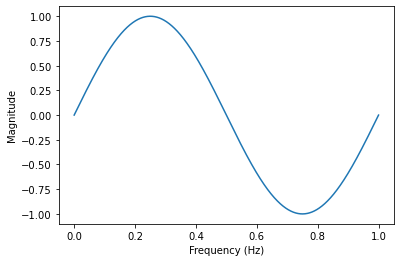

In [10]:
plt.plot(times, samples, label='combined fft')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [11]:
def fft(x):
    n = len(x)
    if n == 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    t = [math.exp(-2j * math.pi * k / n) * odd[k] for k in range(n // 2)]
    return [even[k] + t[k] for k in range(n // 2)] + [even[k] - t[k] for k in range(n // 2)]

In [3]:
area_above_x_axis

0.3915867624049615

In [4]:
area_under_x_axis

-0.376228008118216